# Answer Key to Dynamic Programming PS3 (MACS 30150, Winter 2019)
This notebook is written in Python 3.6. It is the answer key to Dynamic Programming problem set 3 in MACS 30150, Winter 2019.

**Exercise 1.** The problem for an individual who lives for one period $T=1$ is:
\begin{equation}
  V_1(W_1) = \max_{W_2\in[0, W]} u(W_1 - W_2)
\end{equation}
The optimal amount of cake to save for the next period is the minimum amount because utility is increasing in consumption and consumption is decreasing in $W_2$.
\begin{equation}
  W_2 = \psi_1(W_1) =\min(W_2) = 0 \quad \forall W_1
\end{equation}

**Exercise 2.** We know from Exercise 1 that the optimal amount of cake to save for the next period in the last period of life is zero regardless of cake size $W_2$ at the beginning of the second period.
\begin{equation}
  W_3 = \psi_2(W_2) = min(W_3) = 0 \quad \forall W_2
\end{equation}
The first period problem for an individual who lives for two periods $T=2$ is the following:
\begin{equation}
  V(W_1) = \max_{W_2\in[0, W]} u(W_1 - W_2) + \beta V_2(W_2) \quad\forall W_1>0
\end{equation}
From Exercise 1, we can see that the value function in the last period is $V_2(W_2) = u(W_2)$. So taking the derivative of the above maximization problem shows that the choice of cake size in the first period of life to leave for the second period of life $W_2$ is a function of $W_1$ that balances the discounted marginal benefit of saving the cake for tomorrow with the marginal cost of not eating that cake today.
\begin{equation}
  W_2 = \psi_1(W_1):\quad u'(W_1 - W_2) = \beta u'(W_2)
\end{equation}

**Exercise 3.** We know from Exercises 1 and 2 that the optimal amount of cake to save for the next period in the last period of life is zero,
\begin{equation}
  W_4 = \psi_3(W_3) = min(W_4) = 0 \quad \forall W_3
\end{equation}
and the optimal amount of cake to save for the last period of life in the second-to-last period of life $W_3$ balances the marginal benefit of consumption today with the discounted marginal benefit of consumption tomorrow.
\begin{equation}
  W_3 = \psi_2(W_2):\quad u'(W_2 - W_3) = \beta u'(W_3) \quad\forall W_2>0
\end{equation}
The optimal amount of cake to save for the second-to-last period of life in the first period of life $W_2$ also balances the marginal benefit of consumption today with the discounted marginal benefit of consumption tomorrow.
\begin{equation}
  W_2 = \psi_1(W_1):\quad u'(W_1 - W_2) = \beta u'\Bigl(W_2 - \psi_2(W_2)\Bigr) \quad\forall W_1>0
\end{equation}

With log utility, we can solve analytically for the policy function $W_{t+1} = \psi_t\bigl(W_t\bigr)$.
\begin{equation}
  u'(c_t) = \beta u'(c_{t+1}) \quad\Rightarrow\quad \frac{1}{c_t} = \beta\frac{1}{c_{t+1}} \quad\Rightarrow\quad \frac{1}{W_t - W_{t+1}} = \beta\frac{1}{W_{t+1} - W_{t+2}}
\end{equation}
We know that $W_4=0$. This expression implies that optimal cake size $W_3$ chosen in the second-to-last period is the following.
\begin{equation}
  W_3 = \psi_2(W_2) = \left(\frac{\beta}{1 + \beta}\right)W_2
\end{equation}
Cake size saved in the first period for the second period $W_2$ involves using the expression for $W_3$ above and plugging it in to the first-period Euler equation and solving for $W_2$.
\begin{equation}
  \begin{split}
    &\frac{1}{W_1 - W_2} = \beta\frac{1}{W_2 - W_3} \quad\Rightarrow\quad W_2 - W_3 = \beta(W_1 - W_2) \\
    &\Rightarrow\quad W_2 - \left(\frac{\beta}{1 + \beta}\right)W_2 = \beta(W_1 - W_2) \quad\Rightarrow\quad \left(\frac{1}{1 + \beta}\right)W_2 = \beta W_1 - \beta W_2 \\
    &\Rightarrow\quad \left(\frac{1}{1 + \beta} + \beta\right)W_2 = \beta W_1 \quad\Rightarrow\quad \left(\frac{1 + \beta + \beta^2}{1 + \beta} + \beta\right)W_2 = \beta W_1 \\
    &\Rightarrow\quad W_2 = \left(\frac{\beta + \beta^2}{1 + \beta + \beta^2}\right)W_1 \quad\forall W_1>0
  \end{split}
\end{equation}

cake size W_1, W_2, W_3, W_4= [1.         0.63099631 0.29889299 0.        ]
consumption C_1, C_2, C_3= [0.36900369 0.33210332 0.29889299]


<IPython.core.display.Javascript object>


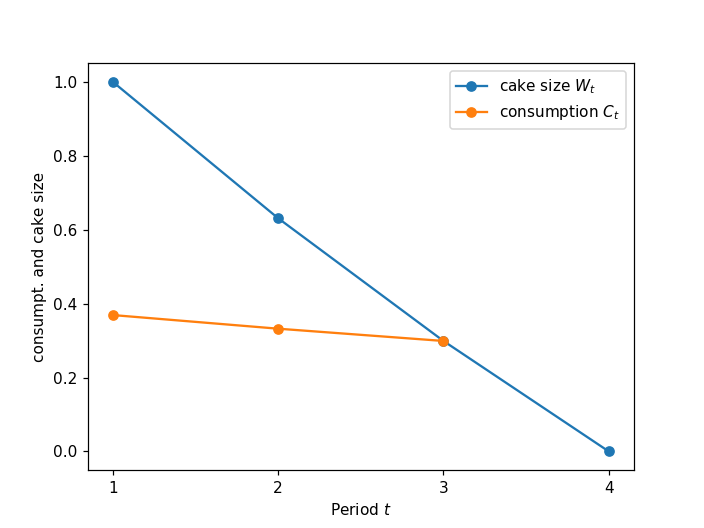

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

beta = 0.9
W_1 = 1
W_2 = (beta + beta ** 2) / (1 + beta + beta ** 2) * W_1
W_3 = (beta / (1 + beta)) * W_2
W_4 = 0
W_vec = np.array([W_1, W_2, W_3, W_4])

C_1 = W_1 - W_2
C_2 = W_2 - W_3
C_3 = W_3 - W_4
C_vec = np.array([C_1, C_2, C_3])

print('cake size W_1, W_2, W_3, W_4=', W_vec)
print('consumption C_1, C_2, C_3=', C_vec)

plt.plot(np.arange(1, 5), W_vec, marker='o', label=r'cake size $W_t$')
plt.plot(np.arange(1, 4), C_vec, marker='o', label=r'consumption $C_t$')
plt.xlabel(r'Period $t$')
plt.ylabel(r'consumpt. and cake size')
plt.xticks(np.arange(1, 5))
plt.legend()

**Exercise 4.** We showed in Exercise 2 that the policy function for choosing cake size in period $T-1$ is characterized by the following condition.
\begin{equation}
  W_T = \psi_{T-1}\bigl(W_{T-1}\bigr): \quad u'\bigl(W_{T-1}-W_T\bigr) = \beta u'\bigl(W_T\bigr) \quad\forall W_{T-1}>0
\end{equation}

The value function in period $T-1$ is the following.
\begin{equation}
  V_{T-1}\bigl(W_{T-1}\bigr) = u\bigl(W_{T-1} - \psi_{T-1}(W_{T-1})\bigr) + \beta V_T\bigl(\psi_{T-1}(W_{T-1})\bigr)
\end{equation}

**Exercise 5.** Assume a cake size $\bar{W}$. We know that
\begin{align}
  V_T\bigl(\bar{W}\bigr) &= u\bigl(\bar{W}\bigr) = \ln\bigl(\bar{W}\bigr) \quad\forall\bar{W} \\
  W_{T+1} &= \psi_T\bigl(\bar{W}\bigr) = 0 \quad\quad\:\: \forall\bar{W}
\end{align}

From Exercise 3, we know that,
\begin{equation}
  W_{T} = \psi_{T-1}\bigl(\bar{W}\bigr) = \left(\frac{\beta}{1+\beta}\right)\bar{W} \quad\forall \bar{W}>0
\end{equation}
Therefore,
\begin{equation}
  \begin{split}
    V_{T-1}\bigl(\bar{W}\bigr) &= \ln\bigl(\bar{W} - \psi_{T-1}(\bar{W})\bigr) + \beta V_T\bigl(\psi_{T-1}(\bar{W})\bigr) = \ln\Biggl(\bar{W} - \biggl(\frac{\beta}{1+\beta}\biggr)\bar{W}\Biggr) + \beta \ln\Biggl(\biggl(\frac{\beta}{1+\beta}\biggr)\bar{W}\Biggr) \\
    &= \ln\Biggl(\biggl[\frac{1}{1+\beta}\biggr]\bar{W}\Biggr) + \beta \ln\Biggl(\biggl[\frac{\beta}{1+\beta}\biggr]\bar{W}\Biggr) = (1 + \beta)\ln(\bar{W}) - (1 + \beta)\ln(1 + \beta) + \beta\ln(\beta) \quad\forall\bar{W}>0
  \end{split}
\end{equation}

From above, we see that $\psi_T(\bar{W})\neq\psi_{T-1}(\bar{W})$ for all $\bar{W}>0$. And we see that $V_T(\bar{W})\neq V_{T-1}(\bar{W})$ in general, for almost all $\bar{W}$.

[Not important for problem set.] However, I think we can show that there exists one and only one value of $\bar{W}$ for which $V_T(\bar{W})= V_{T-1}(\bar{W})$.
\begin{equation}
  V_T(\bar{W})= V_{T-1}(\bar{W}) \iff \bar{W} = \beta e^{\frac{1+\beta}{\beta}\ln(1+\beta)}
\end{equation}

**Exercise 6.** From Exercise 3, we know that the policy function in the second-to-last period of life is,
\begin{equation}
  W_{T-1} = \psi_{T-2}\bigl(W_{T-2}\bigr) = \left(\frac{\beta + \beta^2}{1 + \beta + \beta^2}\right)W_{T-2} \quad\forall W_{T-2}>0
\end{equation}

The analytical solution for $V_{T-2}\bigl(W_{T-2}\bigr)$ is
\begin{equation}
  \begin{split}
    V_{T-2}\bigl(W_{T-2}\bigr) &= \ln\Biggl(W_{T-2} - \biggl[\frac{\beta + \beta^2}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) + \beta V_{T-1}\Biggl(\biggl[\frac{\beta + \beta^2}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) \\
    &= \ln\Biggl(\biggl[\frac{1}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) + \beta V_{T-1}\Biggl(\biggl[\frac{\beta + \beta^2}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr)
  \end{split}
\end{equation}
From Exercise 5, we can substitute in the analytical expression for $V_{T-1}(W_{T-1})$,
\begin{equation}
  \begin{split}
    V_{T-2}\bigl(W_{T-2}\bigr) = \ln\Biggl(\biggl[\frac{1}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) + &\beta \ln\Biggl(\biggl[\frac{1}{1+\beta}\biggr]\biggl[\frac{\beta + \beta^2}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) + ...\\
    &\quad \beta^2\ln\Biggl(\biggl[\frac{\beta}{1+\beta}\biggr]\biggl[\frac{\beta + \beta^2}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr)
  \end{split}
\end{equation}
which reduces to,
\begin{equation}
  \begin{split}
    V_{T-2}\bigl(W_{T-2}\bigr) = \ln\Biggl(\biggl[\frac{1}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) + &\beta \ln\Biggl(\biggl[\frac{\beta}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr) + ...\\
    &\quad \beta^2\ln\Biggl(\biggl[\frac{\beta^2}{1 + \beta + \beta^2}\biggr]W_{T-2}\Biggr)
  \end{split}
\end{equation}

**Exercise 7.** By induction, using the results from Exercises 5 and 6, we see that the analytical solution for the policy function $s$ periods before the final period $T$ is the following,
\begin{equation}
  W_{T-s+1} = \psi_{T-s}\bigl(W_{T-s}\bigr) = \left(\frac{\sum_{i=1}^s\beta^i}{1 + \sum_{i=1}^s\beta^i}\right)W_{T-s}
\end{equation}
and the analytical expression for the value function is the following.
\begin{equation}
  V_{T-s}\bigl(W_{T-s}\bigr) = \sum_{i=0}^s\beta^i \ln\Biggl(\biggl[\frac{\beta^i}{1 + \sum_{j=1}^s\beta^j}\biggr]W_{T-s}\Biggr)
\end{equation}

The limits of these functions, respectively, as $s\rightarrow\infty$ are,
\begin{equation}
  \lim_{s\rightarrow\infty} \psi_{T-s}\bigl(W_{T-s}\bigr) = \frac{\frac{\beta}{1-\beta}}{1 + \frac{\beta}{1-\beta}}W_{T-s} = \frac{\frac{\beta}{1-\beta}}{\frac{1}{1-\beta}}W_{T-s} = \beta W_{T-s}
\end{equation}
\begin{equation}
  \begin{split}
    &\lim_{s\rightarrow\infty} V_{T-s}\bigl(W_{T-s}\bigr) = \sum_{i=0}^s\beta^i \ln\left(\left[\frac{\beta^i}{\frac{1}{1-\beta}}\right]W_{T-s}\right) = \sum_{i=0}^s\beta^i\ln\bigl(\beta^i[1-\beta]W_{T-s}\bigr) \\
    &\quad\quad= \frac{\ln\bigl([1-\beta]W_{T-s}\bigr)}{1 - \beta} + \sum_{i=0}^\infty\beta^i\ln\bigl(\beta^i\bigr) = \frac{\ln\bigl([1-\beta]W_{T-s}\bigr)}{1 - \beta} + \sum_{i=0}^\infty i\beta^i\ln\bigl(\beta\bigr) \\
    &\quad\quad = \frac{\ln\bigl([1-\beta]W_{T-s}\bigr)}{1 - \beta} + \ln\bigl(\beta\bigr)\sum_{i=0}^\infty i\beta^i \\
    &\quad\quad = \frac{\ln\bigl([1-\beta]W_{T-s}\bigr)}{1 - \beta} + \ln\bigl(\beta\bigr)\left[\frac{\beta}{(1-\beta)^2}\right]
  \end{split}
\end{equation}

**Exercise 8.** When the horizon is infinite, we know from the previous exercise that the value function today is the same function as the value function tomorrow $V_{t+1}(W)=V_{t}(W)$. So we can drop the $t$ subscripts. Also, instead of $t$ subscripts on the cake sizes, we denote current period variables without any markings and next period variables with a "$'$" prime.
\begin{equation}
  V\bigl(W\bigr) = \max_{W'}u\bigl(W - W'\bigr) + \beta V\bigl(W'\bigr)
\end{equation}

**Exercise 9.**

In [24]:
W_min = 0.1
W_max = 1.0
N = 100
W_vec = np.linspace(W_min, W_max, N)
print(W_vec)

[0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        0.90909091
 0.918181

**Exercise 10.** We see from the code below that the optimal choice of cake size in the last period is the minimum value, which is 0.01 in this case. The utility of entering the last period with cake size $W$ is $u(W - 0.01)$.

In [25]:
def log_util(c):
    util = np.log(c)
    return util

In [26]:
beta= 0.9
# Assume V_{T+1}(W')=0 for all W'
V_Tp1 = np.zeros(N)

W = W_vec.reshape((N, 1))
Wprime = W_vec.reshape((1, N))
c_mat = np.tile(W, (1, N)) - np.tile(Wprime, (N, 1))
# Set all the negative or zero consumption values to a small number
cpos = c_mat > 0
c_mat[~cpos] = 1e-4
u_mat = log_util(c_mat)
V_Tp1_mat = np.tile(V_Tp1.reshape((1, N)), (N, 1))
# Set all elements of the V_Tp1_mat that correspond to negative consumption
# to a large negative number
V_Tp1_mat[~cpos] = -9e4

# Do one operation of the contraction operator on the V_Tp1 matrix
V_T = (u_mat + beta * V_Tp1_mat).max(axis=1)
print(V_T)
# Get the policy function using the np.argmax method for indices of
# optimal choice of cake size
psi_T_ind = (u_mat + beta * V_Tp1_mat).argmax(axis=1)
psi_T = W_vec[psi_T_ind]
print(psi_T)

[-8.10092103e+04 -4.70048037e+00 -4.00733319e+00 -3.60186808e+00
 -3.31418600e+00 -3.09104245e+00 -2.90872090e+00 -2.75457022e+00
 -2.62103882e+00 -2.50325579e+00 -2.39789527e+00 -2.30258509e+00
 -2.21557372e+00 -2.13553101e+00 -2.06142304e+00 -1.99243016e+00
 -1.92789164e+00 -1.86726702e+00 -1.81010861e+00 -1.75604139e+00
 -1.70474809e+00 -1.65595793e+00 -1.60943791e+00 -1.56498615e+00
 -1.52242654e+00 -1.48160454e+00 -1.44238383e+00 -1.40464350e+00
 -1.36827586e+00 -1.33318454e+00 -1.29928298e+00 -1.26649316e+00
 -1.23474446e+00 -1.20397280e+00 -1.17411984e+00 -1.14513230e+00
 -1.11696143e+00 -1.08956245e+00 -1.06289421e+00 -1.03691872e+00
 -1.01160091e+00 -9.86908299e-01 -9.62810748e-01 -9.39280250e-01
 -9.16290732e-01 -8.93817876e-01 -8.71838969e-01 -8.50332764e-01
 -8.29279355e-01 -8.08660068e-01 -7.88457360e-01 -7.68654733e-01
 -7.49236647e-01 -7.30188452e-01 -7.11496319e-01 -6.93147181e-01
 -6.75128675e-01 -6.57429098e-01 -6.40037355e-01 -6.22942922e-01
 -6.06135804e-01 -5.89606

**Exercise 11.**

In [27]:
# Distance metric dist is the sum of squared deviations of
# each element in V_t and V_{t+1}
dist_T = ((V_Tp1 - V_T) ** 2).sum()
print(dist_T)

6562492358.243849


**Exercise 12.**

In [28]:
# We can reuse all the W, Wprime, c_mat, u_mat
V_T_mat = np.tile(V_T.reshape((1, N)), (N, 1))
# Set all elements of the V_T_mat that correspond to negative consumption
# to a large negative number
V_T_mat[~cpos] = -9e4

# Do one operation of the contraction operator on the V_Tp1 matrix
V_Tm1 = (u_mat + beta * V_T_mat).max(axis=1)
print(V_Tm1)
# Get the policy function using the np.argmax method for indices of
# optimal choice of cake size
psi_Tm1_ind = (u_mat + beta * V_T_mat).argmax(axis=1)
psi_Tm1 = W_vec[psi_Tm1_ind]
print(psi_Tm1)

# Compute the distance metric between V_T and V_Tm1
dist_Tm1 = ((V_T - V_Tm1) ** 2).sum()
print('dist_Tm1=', dist_Tm1)
print('dist_T=', dist_T)

[-8.10092103e+04 -7.29129898e+04 -8.93091270e+00 -8.23776551e+00
 -7.61393305e+00 -7.20846794e+00 -6.84354935e+00 -6.55586727e+00
 -6.29695341e+00 -6.07380986e+00 -5.87298066e+00 -5.69065910e+00
 -5.52656970e+00 -5.37241902e+00 -5.23368341e+00 -5.10015202e+00
 -4.97997377e+00 -4.86219073e+00 -4.75618600e+00 -4.65082548e+00
 -4.55551530e+00 -4.46069084e+00 -4.37367946e+00 -4.28790030e+00
 -4.20785759e+00 -4.12954735e+00 -4.05543938e+00 -3.98340094e+00
 -3.91440807e+00 -3.84771090e+00 -3.78317238e+00 -3.72107879e+00
 -3.66045417e+00 -3.60236950e+00 -3.54521109e+00 -3.49064893e+00
 -3.43658171e+00 -3.38513913e+00 -3.33384584e+00 -3.28505568e+00
 -3.23639518e+00 -3.18987516e+00 -3.14371120e+00 -3.09925943e+00
 -3.05534829e+00 -3.01278867e+00 -2.97092066e+00 -2.93009866e+00
 -2.89009208e+00 -2.85087136e+00 -2.81256771e+00 -2.77482738e+00
 -2.73808759e+00 -2.70171994e+00 -2.66642130e+00 -2.63132998e+00
 -2.59736369e+00 -2.56346213e+00 -2.53067231e+00 -2.49794143e+00
 -2.46619273e+00 -2.43461

**Exercise 13.**

In [29]:
# We can reuse all the W, Wprime, c_mat, u_mat
V_Tm1_mat = np.tile(V_Tm1.reshape((1, N)), (N, 1))
# Set all elements of the V_Tm1_mat that correspond to negative consumption
# to a large negative number
V_Tm1_mat[~cpos] = -9e4

# Do one operation of the contraction operator on the V_Tp1 matrix
V_Tm2 = (u_mat + beta * V_Tm1_mat).max(axis=1)
print(V_Tm2)
# Get the policy function using the np.argmax method for indices of
# optimal choice of cake size
psi_Tm2_ind = (u_mat + beta * V_Tm1_mat).argmax(axis=1)
psi_Tm2 = W_vec[psi_Tm2_ind]
print(psi_Tm2)

# Compute the distance metric between V_Tm1 and V_Tm2
dist_Tm2 = ((V_Tm1 - V_Tm2) ** 2).sum()
print('dist_Tm2=', dist_Tm2)
print('dist_Tm1=', dist_Tm1)

[-8.10092103e+04 -7.29129898e+04 -6.56263913e+04 -1.27383018e+01
 -1.20451546e+01 -1.14213221e+01 -1.08598729e+01 -1.04544078e+01
 -1.00894892e+01 -9.76106249e+00 -9.47338042e+00 -9.21446655e+00
 -8.98144407e+00 -8.75830052e+00 -8.55747133e+00 -8.37514977e+00
 -8.19440349e+00 -8.03031409e+00 -7.87616341e+00 -7.72848295e+00
 -7.58974734e+00 -7.45621595e+00 -7.33135389e+00 -7.21117564e+00
 -7.09339261e+00 -6.98523218e+00 -6.87922745e+00 -6.77386693e+00
 -6.67846267e+00 -6.58315249e+00 -6.48832803e+00 -6.40131665e+00
 -6.31553749e+00 -6.23019547e+00 -6.15015276e+00 -6.07184252e+00
 -5.99464128e+00 -5.92053331e+00 -5.84849487e+00 -5.77801565e+00
 -5.70902278e+00 -5.64232561e+00 -5.57749101e+00 -5.51295249e+00
 -5.45085891e+00 -5.39023429e+00 -5.33020683e+00 -5.27212216e+00
 -5.21496375e+00 -5.15907952e+00 -5.10451736e+00 -5.05045014e+00
 -4.99817394e+00 -4.94673137e+00 -4.89543807e+00 -4.84633213e+00
 -4.79754196e+00 -4.74888146e+00 -4.70236145e+00 -4.65606313e+00
 -4.60989917e+00 -4.56544

**Exercise 14.**

In [30]:
toler = 1e-9
maxiter = 200
VF_iter = 0
dist = 10

# Make initial guess of value function
V_init = np.zeros(N)

while (dist > toler) and (VF_iter < maxiter):
    VF_iter += 1
    
    # We can reuse all the W, Wprime, c_mat, u_mat
    V_pr_mat = np.tile(V_init.reshape((1, N)), (N, 1))
    # Set all elements of the V_pr_mat that correspond to negative
    # consumption to a large negative number
    V_pr_mat[~cpos] = -9e4

    # Do one operation of the contraction operator on the V_pr_mat matrix
    V_new = (u_mat + beta * V_pr_mat).max(axis=1)
    
    # Get the policy function using the np.argmax method for indices of
    # optimal choice of cake size
    psi_ind = (u_mat + beta * V_pr_mat).argmax(axis=1)
    psi = W_vec[psi_ind]
    
    # Compute the distance metric between V_init and V_new
    dist = ((V_new - V_init) ** 2).sum()
    print('Iteration=', VF_iter, ', dist=', dist)
    V_init = V_new

V = V_init
print('Value function=', V)
print('Policy function=', psi)

Iteration= 1 , dist= 6562492358.243849
Iteration= 2 , dist= 5315619202.980871
Iteration= 3 , dist= 4305651738.740974
Iteration= 4 , dist= 3487578021.941797
Iteration= 5 , dist= 2824938273.7546215
Iteration= 6 , dist= 2288200055.063121
Iteration= 7 , dist= 1853442083.090877
Iteration= 8 , dist= 1501288115.714663
Iteration= 9 , dist= 1216043395.1449144
Iteration= 10 , dist= 984995166.4105073
Iteration= 11 , dist= 797846097.4693251
Iteration= 12 , dist= 646255348.8967885
Iteration= 13 , dist= 523466840.577885
Iteration= 14 , dist= 424008147.2547546
Iteration= 15 , dist= 343446604.55986387
Iteration= 16 , dist= 278191754.08957195
Iteration= 17 , dist= 225335324.4998223
Iteration= 18 , dist= 182521616.067609
Iteration= 19 , dist= 147842511.8414824
Iteration= 20 , dist= 119752437.06438972
Iteration= 21 , dist= 96999476.2060691
Iteration= 22 , dist= 78569577.7686083
Iteration= 23 , dist= 63641359.923770264
Iteration= 24 , dist= 51549503.36512649
Iteration= 25 , dist= 41755099.45638903
Iterati

**Exercise 15.**

<IPython.core.display.Javascript object>


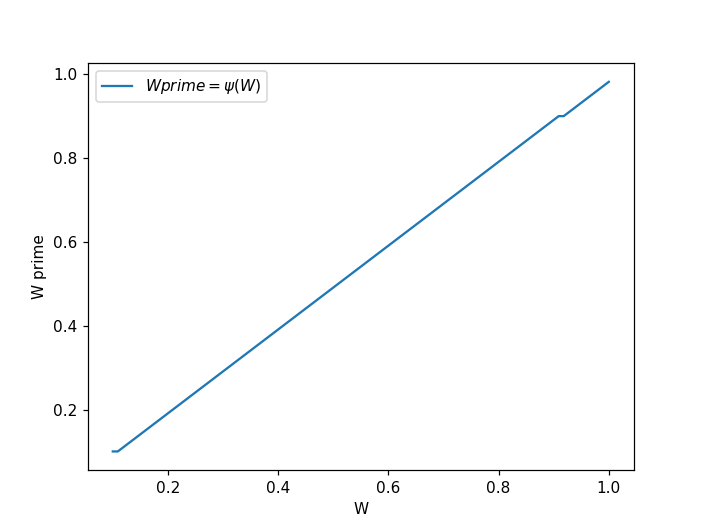

In [31]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(W_vec, psi, label=r'$W prime=\psi(W)$')
plt.xlabel(r'W')
plt.ylabel(r'W prime')
plt.legend()

**Exercise 16.**

In [32]:
import scipy.stats as sts

M = 7
sigma = 0.5
mu = 4 * sigma
e_min = mu - 3 * sigma
e_max = mu + 3 * sigma
e_vec = np.linspace(e_min, e_max, M)

# Use the midpoints between the points in e_vec as the bin
# boundaries for calculating the probability of each point
e_midpts = e_vec[:-1] + 0.5 * (e_vec[1:] - e_vec[:-1])
Pr_e = np.zeros(M)
for e_ind in range(M):
    if e_ind == 0:
        Pr_e[e_ind] = sts.norm.cdf(e_midpts[e_ind], loc=mu, scale=sigma)
    elif e_ind > 0 and e_ind < M - 1:
        Pr_e[e_ind] = (sts.norm.cdf(e_midpts[e_ind], loc=mu, scale=sigma) -
                       sts.norm.cdf(e_midpts[e_ind - 1], loc=mu, scale=sigma))
    elif e_ind == M - 1:
        Pr_e[e_ind] = 1 - sts.norm.cdf(e_midpts[e_ind - 1], loc=mu, scale=sigma)

print('e_midpts', e_midpts)
print('e_vec=', e_vec)
print('Pr_e=', Pr_e)
print('Sum(Pr_e)=', Pr_e.sum())

e_midpts [0.75 1.25 1.75 2.25 2.75 3.25]
e_vec= [0.5 1.  1.5 2.  2.5 3.  3.5]
Pr_e= [0.00620967 0.06059754 0.24173034 0.38292492 0.24173034 0.06059754
 0.00620967]
Sum(Pr_e)= 1.0


**Exercise 17.**

In [33]:
# Assume V_{T+1}(W')=0 for all W'
V_Tp1 = np.zeros((N, M))

W_arr = np.tile(W_vec.reshape((N, 1, 1)), (1, M, N))
Wpr_arr = np.tile(W_vec.reshape((1, 1, N)), (N, M, 1))
e_arr = np.tile(e_vec.reshape((1, M, 1)), (N, 1, N))
c_arr = W_arr - Wpr_arr
# Set all the negative or zero consumption values to a small number
cpos = c_arr > 0
c_arr[~cpos] = 1e-4
u_arr = e_arr * log_util(c_arr)
Pr_e_mat = np.tile(Pr_e.reshape((1, M)), (N, 1))
Exp_V_Tp1 = (Pr_e_mat * V_Tp1).sum(axis=1)
Exp_V_Tp1_arr = np.tile(Exp_V_Tp1.reshape((1, 1, N)), (N, M, 1))
# Set all elements of the Exp_V_Tp1_arr that correspond to negative
# consumption to a large negative number
Exp_V_Tp1_arr[~cpos] = -9e4

# Do one operation of the contraction operator on the V_Tp1 matrix
V_T = (u_arr + beta * Exp_V_Tp1_arr).max(axis=2)
print(V_T)
# Get the policy function using the np.argmax method for indices of
# optimal choice of cake size
psi_T_ind = (u_arr + beta * Exp_V_Tp1_arr).argmax(axis=2)
psi_T = W_vec[psi_T_ind]
print(psi_T)

[[-8.10046052e+04 -8.10092103e+04 -8.10138155e+04 -8.10184207e+04
  -8.10230259e+04 -8.10276310e+04 -8.10322362e+04]
 [-2.35024018e+00 -4.70048037e+00 -7.05072055e+00 -9.40096073e+00
  -1.17512009e+01 -1.41014411e+01 -1.64516813e+01]
 [-2.00366659e+00 -4.00733319e+00 -6.01099978e+00 -8.01466637e+00
  -1.00183330e+01 -1.20219996e+01 -1.40256661e+01]
 [-1.80093404e+00 -3.60186808e+00 -5.40280212e+00 -7.20373615e+00
  -9.00467019e+00 -1.08056042e+01 -1.26065383e+01]
 [-1.65709300e+00 -3.31418600e+00 -4.97127901e+00 -6.62837201e+00
  -8.28546501e+00 -9.94255801e+00 -1.15996510e+01]
 [-1.54552123e+00 -3.09104245e+00 -4.63656368e+00 -6.18208491e+00
  -7.72760613e+00 -9.27312736e+00 -1.08186486e+01]
 [-1.45436045e+00 -2.90872090e+00 -4.36308134e+00 -5.81744179e+00
  -7.27180224e+00 -8.72616269e+00 -1.01805231e+01]
 [-1.37728511e+00 -2.75457022e+00 -4.13185533e+00 -5.50914043e+00
  -6.88642554e+00 -8.26371065e+00 -9.64099576e+00]
 [-1.31051941e+00 -2.62103882e+00 -3.93155824e+00 -5.24207765e+0

**Exercise 18.**

In [34]:
# Distance metric dist is the sum of squared deviations of
# each element in V_t and V_{t+1}
dist_T = ((V_Tp1 - V_T) ** 2).sum()
print(dist_T)

45947898960.58924


**Exercise 19.**

In [35]:
# We can reuse all the W_arr, Wpr_arr, c_arr, u_arr
Exp_V_T = (Pr_e_mat * V_T).sum(axis=1)
Exp_V_T_arr = np.tile(Exp_V_T.reshape((1, 1, N)), (N, M, 1))
# Set all elements of the Exp_V_T_arr that correspond to negative
# consumption to a large negative number
Exp_V_T_arr[~cpos] = -9e4

# Do one operation of the contraction operator on the V_Tp1 matrix
V_Tm1 = (u_arr + beta * Exp_V_T_arr).max(axis=2)
print(V_Tm1)
# Get the policy function using the np.argmax method for indices of
# optimal choice of cake size
psi_Tm1_ind = (u_arr + beta * Exp_V_T_arr).argmax(axis=2)
psi_Tm1 = W_vec[psi_Tm1_ind]
print(psi_Tm1)

# Compute the distance metric between V_T and V_Tm1
dist_Tm1 = ((V_T - V_Tm1) ** 2).sum()
print('dist_Tm1=', dist_Tm1)
print('dist_T=', dist_T)

[[-8.10046052e+04 -8.10092103e+04 -8.10138155e+04 -8.10184207e+04
  -8.10230259e+04 -8.10276310e+04 -8.10322362e+04]
 [-7.29189289e+04 -7.29212791e+04 -7.29236293e+04 -7.29259796e+04
  -7.29283298e+04 -7.29306801e+04 -7.29330303e+04]
 [-1.08111048e+01 -1.31613450e+01 -1.55115852e+01 -1.78618254e+01
  -2.02120656e+01 -2.25623058e+01 -2.49125459e+01]
 [-9.56343992e+00 -1.19136801e+01 -1.42639203e+01 -1.64755310e+01
  -1.84791976e+01 -2.04828642e+01 -2.24865308e+01]
 [-8.83360272e+00 -1.11838429e+01 -1.32241995e+01 -1.52278661e+01
  -1.72315327e+01 -1.92351993e+01 -2.10674029e+01]
 [-8.31577499e+00 -1.04906957e+01 -1.24943623e+01 -1.44169359e+01
  -1.62178699e+01 -1.80188040e+01 -1.98197380e+01]
 [-7.91411660e+00 -9.97286799e+00 -1.18861647e+01 -1.36870987e+01
  -1.54880327e+01 -1.71557577e+01 -1.88128507e+01]
 [-7.56754301e+00 -9.56740289e+00 -1.13683369e+01 -1.31117345e+01
  -1.47688276e+01 -1.64259206e+01 -1.80318483e+01]
 [-7.23936421e+00 -9.16574449e+00 -1.09368138e+01 -1.25939068e+0

**Exercise 20.**

In [36]:
# We can reuse all the W_arr, Wpr_arr, c_arr, u_arr
Exp_V_Tm1 = (Pr_e_mat * V_Tm1).sum(axis=1)
Exp_V_Tm1_arr = np.tile(Exp_V_Tm1.reshape((1, 1, N)), (N, M, 1))
# Set all elements of the Exp_V_Tm1_arr that correspond to negative
# consumption to a large negative number
Exp_V_Tm1_arr[~cpos] = -9e4

# Do one operation of the contraction operator on the V_Tm1 matrix
V_Tm2 = (u_arr + beta * Exp_V_Tm1_arr).max(axis=2)
print(V_Tm2)
# Get the policy function using the np.argmax method for indices of
# optimal choice of cake size
psi_Tm2_ind = (u_arr + beta * Exp_V_Tm1_arr).argmax(axis=2)
psi_Tm2 = W_vec[psi_Tm2_ind]
print(psi_Tm2)

# Compute the distance metric between V_Tm1 and V_Tm2
dist_Tm2 = ((V_Tm1 - V_Tm2) ** 2).sum()
print('dist_Tm2=', dist_Tm2)
print('dist_Tm1=', dist_Tm1)

[[-8.10046052e+04 -8.10092103e+04 -8.10138155e+04 -8.10184207e+04
  -8.10230259e+04 -8.10276310e+04 -8.10322362e+04]
 [-7.29189289e+04 -7.29212791e+04 -7.29236293e+04 -7.29259796e+04
  -7.29283298e+04 -7.29306801e+04 -7.29330303e+04]
 [-6.56357319e+04 -6.56380821e+04 -6.56404323e+04 -6.56427826e+04
  -6.56451328e+04 -6.56474831e+04 -6.56498333e+04]
 [-1.84258830e+01 -2.07761232e+01 -2.31263634e+01 -2.54766036e+01
  -2.78268438e+01 -3.01770839e+01 -3.25273241e+01]
 [-1.70977002e+01 -1.94479404e+01 -2.17981806e+01 -2.40903092e+01
  -2.60939758e+01 -2.80976424e+01 -3.01013090e+01]
 [-1.60502185e+01 -1.84004587e+01 -2.07506989e+01 -2.27621264e+01
  -2.47657930e+01 -2.67694596e+01 -2.86821811e+01]
 [-1.52774255e+01 -1.76276656e+01 -1.97109781e+01 -2.17146447e+01
  -2.37183113e+01 -2.55530643e+01 -2.73539983e+01]
 [-1.46516189e+01 -1.69345185e+01 -1.89381851e+01 -2.09037145e+01
  -2.27046485e+01 -2.45055825e+01 -2.63065166e+01]
 [-1.41159857e+01 -1.63087119e+01 -1.83123785e+01 -2.01309214e+0

**Exercise 21.** It takes 101 iterations to converge.

In [37]:
toler = 1e-9
maxiter = 200
VF_iter = 0
dist = 10

# Make initial guess of value function
V_init = np.zeros((N, M))

while (dist > toler) and (VF_iter < maxiter):
    VF_iter += 1
    
    # We can reuse all the W, Wprime, c_mat, u_mat
    Exp_V_pr = (Pr_e_mat * V_init).sum(axis=1)
    Exp_V_pr_arr = np.tile(Exp_V_pr.reshape((1, 1, N)), (N, M, 1))
    # Set all elements of the Exp_V_pr_arr that correspond to negative
    # consumption to a large negative number
    Exp_V_pr_arr[~cpos] = -9e4
    
    # Do one operation of the contraction operator on the V_Tm1 matrix
    V_new = (u_arr + beta * Exp_V_pr_arr).max(axis=2)
    
    # Get the policy function using the np.argmax method for indices of
    # optimal choice of cake size
    psi_ind = (u_arr + beta * Exp_V_pr_arr).argmax(axis=2)
    psi = W_vec[psi_ind]
    
    # Compute the distance metric between V_init and V_new
    dist = ((V_new - V_init) ** 2).sum()
    print('Iteration=', VF_iter, ', dist=', dist)
    V_init = V_new

V = V_init
print('Value function=', V)
print('Policy function=', psi)

Iteration= 1 , dist= 45947898960.58924
Iteration= 2 , dist= 37217807076.08903
Iteration= 3 , dist= 30146428923.897926
Iteration= 4 , dist= 24418610594.98602
Iteration= 5 , dist= 19779076699.034943
Iteration= 6 , dist= 16021053611.313124
Iteration= 7 , dist= 12977054501.240526
Iteration= 8 , dist= 10511414943.440615
Iteration= 9 , dist= 8514246706.785007
Iteration= 10 , dist= 6896540295.115028
Iteration= 11 , dist= 5586197999.636215
Iteration= 12 , dist= 4524820664.704872
Iteration= 13 , dist= 3665104966.9064126
Iteration= 14 , dist= 2968735209.122971
Iteration= 15 , dist= 2404675672.9009814
Iteration= 16 , dist= 1947787423.863383
Iteration= 17 , dist= 1577707923.1079497
Iteration= 18 , dist= 1277943512.7243714
Iteration= 19 , dist= 1035134328.7909029
Iteration= 20 , dist= 838458880.9020425
Iteration= 21 , dist= 679151761.2292145
Iteration= 22 , dist= 550112988.9797764
Iteration= 23 , dist= 445591579.2352848
Iteration= 24 , dist= 360929233.8425693
Iteration= 25 , dist= 292352731.064273


**Exercise 22.**

<IPython.core.display.Javascript object>


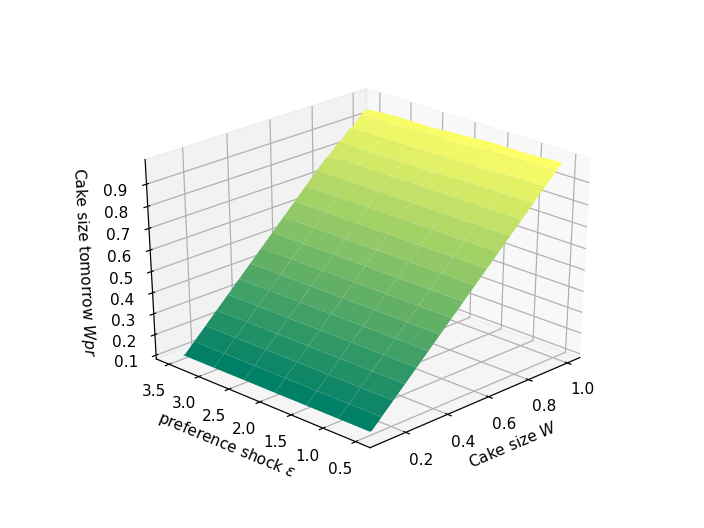

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Plot 3D steady-state consumption distribution
Wmat, emat = np.meshgrid(W_vec, e_vec)
cmap_c = cm.get_cmap('summer')
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(r'Cake size $W$')
ax.set_ylabel(r'preference shock $\varepsilon$')
ax.set_zlabel(r'Cake size tomorrow $Wpr$')
ax.plot_surface(Wmat, emat, psi.T, rstride=1,
                cstride=6, cmap=cmap_c)